In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
artist = pd.read_csv("Artist Sculpture Cost.csv")
artist.head(5)

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06-07-2015,06-03-2015,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03-06-2017,03-05-2017,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03-09-2015,03-08-2015,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [3]:
artist.shape

(6500, 20)

In [4]:
# So we are predicting the cost(price) a customer might pay to get the painting.

In [5]:
artist.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [6]:
artist = artist.dropna(how = 'any')
artist.shape

(3362, 20)

In [7]:
artist_cost_positive = artist[artist['Cost'] > 0]
artist_cost_positive.shape

(3030, 20)

In [8]:
# As you could see above, there were some costs that were negative, so I have excluded those costs from the dataset.

artist_cost_positive.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,3030.000000,3030.000000,3030.000000,3.030000e+03,3030.000000,3030.000000,3.030000e+03
mean,0.462419,21.938944,9.660396,4.221486e+05,1300.495635,36.939416,1.642879e+04
std,0.266421,11.894853,5.460551,3.099541e+06,10080.916618,26.453719,1.539658e+05
min,0.000000,3.000000,2.000000,4.000000e+00,3.000000,10.000000,8.607000e+01
25%,0.240000,13.000000,6.000000,5.080000e+02,5.260000,16.765000,2.303725e+02
50%,0.450000,21.000000,8.000000,3.007500e+03,7.765000,23.465000,4.583750e+02
75%,0.680000,30.000000,12.000000,3.579700e+04,91.322500,56.630000,1.359648e+03
max,1.000000,73.000000,45.000000,1.179279e+08,382385.670000,99.950000,4.020732e+06


In [9]:
# Replace '/' with '-' in the date columns
artist_cost_positive['Scheduled Date'] = artist_cost_positive['Scheduled Date'].astype(str).str.replace('/', '-', regex=True)
artist_cost_positive['Delivery Date'] = artist_cost_positive['Delivery Date'].astype(str).str.replace('/', '-', regex=True)

# Now convert to datetime without specifying a format for mixed date formats
artist_cost_positive['Scheduled Date'] = pd.to_datetime(artist_cost_positive['Scheduled Date'], errors='coerce')
artist_cost_positive['Delivery Date'] = pd.to_datetime(artist_cost_positive['Delivery Date'], errors='coerce')

C:\Users\RS\AppData\Local\Temp\ipykernel_18320\1633600265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_cost_positive['Scheduled Date'] = artist_cost_positive['Scheduled Date'].astype(str).str.replace('/', '-', regex=True)
C:\Users\RS\AppData\Local\Temp\ipykernel_18320\1633600265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_cost_positive['Delivery Date'] = artist_cost_positive['Delivery Date'].astype(str).str.replace('/', '-', regex=True)
C:\Users\RS\AppData\Local\Temp\ipykernel_1

In [10]:
artist_cost_positive['Delivery Date'].isnull().sum()

1818

In [11]:
artist_cost_positive['Scheduled Date'].isnull().sum()

0

In [12]:
# Finding categorical data in the dataset:

artist_cost_positive['Material'].value_counts()

Material
Aluminium    470
Marble       451
Brass        433
Clay         432
Wood         425
Bronze       415
Stone        404
Name: count, dtype: int64

In [13]:
artist_cost_positive['International'].value_counts()

International
No     2007
Yes    1023
Name: count, dtype: int64

In [14]:
artist_cost_positive['Express Shipment'].value_counts()

Express Shipment
No     2041
Yes     989
Name: count, dtype: int64

In [15]:
artist_cost_positive['Installation Included'].value_counts()

Installation Included
No     1799
Yes    1231
Name: count, dtype: int64

In [16]:
artist_cost_positive['Transport'].value_counts()

Transport
Roadways     1239
Airways      1071
Waterways     720
Name: count, dtype: int64

In [17]:
artist_cost_positive['Fragile'].value_counts()

Fragile
No     2547
Yes     483
Name: count, dtype: int64

In [18]:
artist_cost_positive['Customer Information'].value_counts()

Customer Information
Working Class    2211
Wealthy           819
Name: count, dtype: int64

In [19]:
artist_cost_positive['Remote Location'].value_counts()

Remote Location
No     2442
Yes     588
Name: count, dtype: int64

In [20]:
# So there are more than 3000 artists in the dataset that we have narrowed down.

artist_cost_positive['Artist Name'].value_counts()

Artist Name
John Brown          3
James Moore         3
Charles Jones       2
Mary Williams       2
Catherine Martin    2
                   ..
Yvonne Hough        1
Peggy Gregory       1
Ron Pigott          1
Keith Hileman       1
Vernon Carroll      1
Name: count, Length: 3019, dtype: int64

In [21]:
# Converting the categorical datatypes into numerical ones
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [22]:
name_list = ['Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile',
            'Customer Information', 'Remote Location']

for name in name_list:
  artist_cost_positive[name] = label_encoded(artist_cost_positive[name])

artist_cost_positive.head(3)  

Material ['Aluminium' 'Brass' 'Bronze' 'Clay' 'Marble' 'Stone' 'Wood']
International ['No' 'Yes']
Express Shipment ['No' 'Yes']
Installation Included ['No' 'Yes']
Transport ['Airways' 'Roadways' 'Waterways']
Fragile ['No' 'Yes']
Customer Information ['Wealthy' 'Working Class']
Remote Location ['No' 'Yes']


C:\Users\RS\AppData\Local\Temp\ipykernel_18320\497997856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_cost_positive[name] = label_encoded(artist_cost_positive[name])
C:\Users\RS\AppData\Local\Temp\ipykernel_18320\497997856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_cost_positive[name] = label_encoded(artist_cost_positive[name])
C:\Users\RS\AppData\Local\Temp\ipykernel_18320\497997856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
650,fffe3800340030003400,George Hartman,0.94,5.0,5.0,62.0,6,6.17,23.53,0,1,0,1,0,1,0,2018-02-13,2018-02-12,"Lake Debraport, MI 42385",561.98
651,fffe3600360039003000,Vincent Daves,0.64,5.0,5.0,315.0,1,5.74,15.91,0,0,0,1,0,1,0,2018-11-28,NaT,"Monicaton, AK 90457",243.11
653,fffe330037003500,Marcia Chevrette,0.74,25.0,18.0,917520.0,4,848.75,52.62,0,1,1,1,0,0,0,2017-12-18,NaT,"South Richard, HI 75014",87760.07


In [23]:
artist_cost_positive.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

In [24]:
# Outliers in the data - We are going to remove them.
# Height - 55 and above.
# Width - 22 and above.
# Price Of Sculpture - 100k and above
# Cost - 1.5 * 10^6 and above

<Axes: ylabel='Height'>

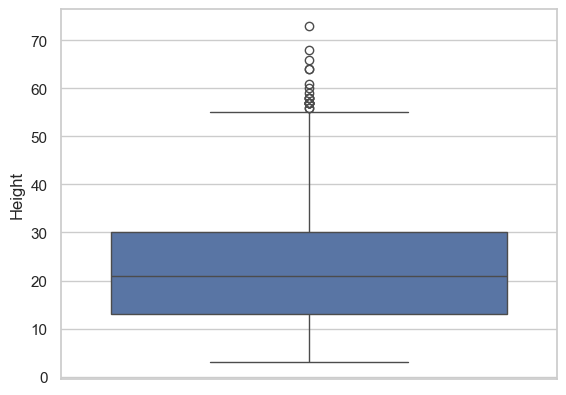

In [25]:
sns.set_theme(style="whitegrid")
sns.boxplot(artist_cost_positive['Height']) # change the column name to see the outliers for all the columns.

In [26]:
artist_cost_positive = artist_cost_positive[artist_cost_positive['Height'] < 53]
artist_cost_positive = artist_cost_positive[artist_cost_positive['Width'] < 22]
artist_cost_positive = artist_cost_positive[artist_cost_positive['Price Of Sculpture'] < 4000]
artist_cost_positive = artist_cost_positive[artist_cost_positive['Cost'] < 25000]

<Axes: ylabel='Cost'>

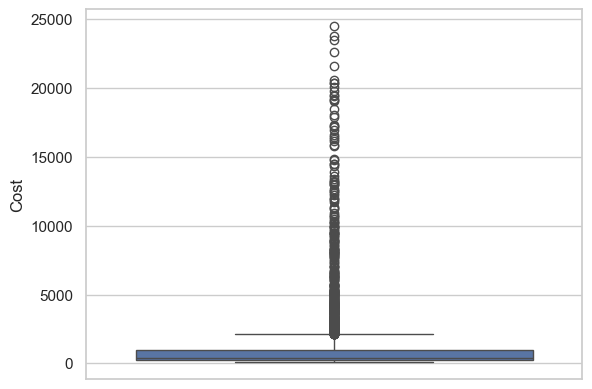

In [27]:
sns.boxplot(artist_cost_positive['Cost'])

In [28]:
artist_cost_positive.shape

(2765, 20)

In [29]:
# Removing columns that are not required:

X = artist_cost_positive.drop(['Customer Id', 'Artist Name', 'Customer Location'], axis = 1)

<Axes: >

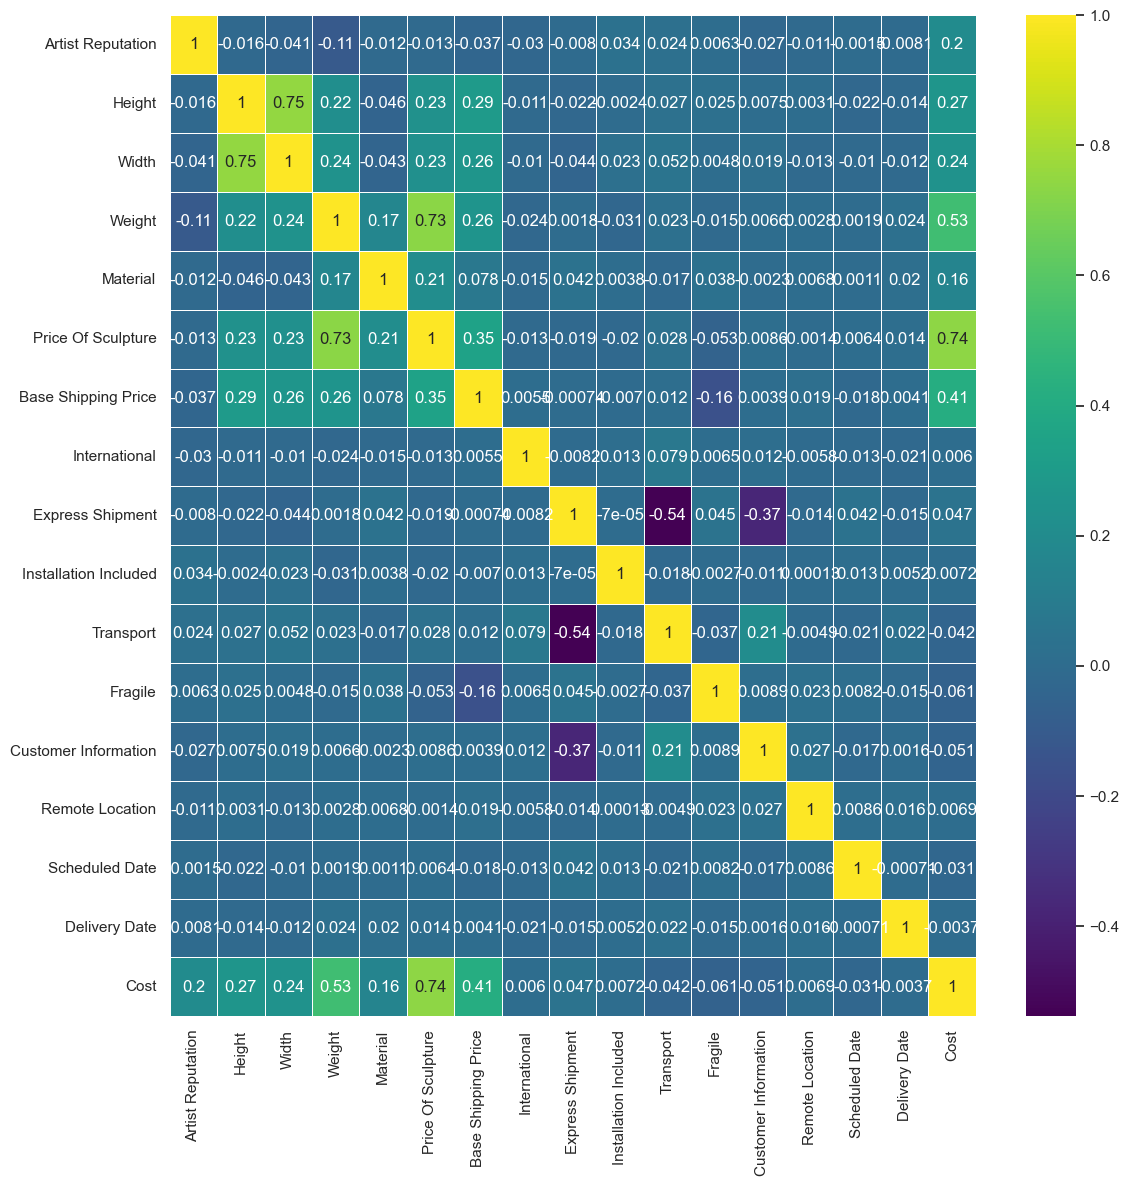

In [30]:
plt.figure(figsize=(13,13))
sns.heatmap(X.corr(),annot=True,cmap='viridis',linewidths=.5)

In [31]:
# Some interesting findings that you can see from the above graph is, first the price of the painting or sculpture is not affected much
# by whom it has been created as you can see the correlation of price(cost) to that of artists reputation is very low.
# Next you can see the base price of the painting or sculpture is very much correlated to the weight, which is bizarre.
# You can try to find other meaning from the correlational graph as well.

In [32]:
X['Waiting time'] = X['Scheduled Date'] - X["Delivery Date"]
X.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,Waiting time
650,0.94,5.0,5.0,62.0,6,6.17,23.53,0,1,0,1,0,1,0,2018-02-13,2018-02-12,561.98,1 days
651,0.64,5.0,5.0,315.0,1,5.74,15.91,0,0,0,1,0,1,0,2018-11-28,NaT,243.11,NaT
662,0.65,22.0,6.0,8737.0,1,22.05,68.33,0,1,1,0,0,1,0,2015-12-15,NaT,1271.89,NaT
664,0.59,26.0,6.0,133987.0,4,409.78,55.05,0,1,0,0,0,0,0,2016-07-24,NaT,3619.57,NaT
667,0.24,19.0,6.0,170477.0,5,529.95,48.53,0,0,0,0,0,0,1,2016-12-16,NaT,2122.79,NaT


In [33]:
# Removing the 'days' from the Waiting time data column.

time_list = X['Waiting time'].to_list()
print(str(time_list[0]).split(" ")[0])

1


In [34]:
def extractingSize(item):
  count = 0
  try:
    s = str(item).split(" ")
    return float(s[0])
  except:
    count = count + 1
    pass

X['Waiting time'] = X['Waiting time'].map(extractingSize)

In [35]:
X.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,Waiting time
650,0.94,5.0,5.0,62.0,6,6.17,23.53,0,1,0,1,0,1,0,2018-02-13,2018-02-12,561.98,1.0
651,0.64,5.0,5.0,315.0,1,5.74,15.91,0,0,0,1,0,1,0,2018-11-28,NaT,243.11,NaN
662,0.65,22.0,6.0,8737.0,1,22.05,68.33,0,1,1,0,0,1,0,2015-12-15,NaT,1271.89,NaN
664,0.59,26.0,6.0,133987.0,4,409.78,55.05,0,1,0,0,0,0,0,2016-07-24,NaT,3619.57,NaN
667,0.24,19.0,6.0,170477.0,5,529.95,48.53,0,0,0,0,0,0,1,2016-12-16,NaT,2122.79,NaN


In [36]:
y = X['Cost']
X = X.drop(['Scheduled Date', 'Delivery Date', 'Cost'], axis = 1)

In [37]:
X.shape

(2765, 15)

In [45]:
X.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Waiting time
650,0.94,5.0,5.0,62.0,6,6.17,23.53,0,1,0,1,0,1,0,1.0
651,0.64,5.0,5.0,315.0,1,5.74,15.91,0,0,0,1,0,1,0,NaN
662,0.65,22.0,6.0,8737.0,1,22.05,68.33,0,1,1,0,0,1,0,NaN
664,0.59,26.0,6.0,133987.0,4,409.78,55.05,0,1,0,0,0,0,0,NaN
667,0.24,19.0,6.0,170477.0,5,529.95,48.53,0,0,0,0,0,0,1,NaN


In [47]:
X.dtypes

Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                   int32
Price Of Sculpture       float64
Base Shipping Price      float64
International              int32
Express Shipment           int32
Installation Included      int32
Transport                  int32
Fragile                    int32
Customer Information       int32
Remote Location            int32
Waiting time             float64
dtype: object

In [46]:
y.head()

650     561.98
651     243.11
662    1271.89
664    3619.57
667    2122.79
Name: Cost, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [40]:
random_model = RandomForestRegressor(n_estimators=200, n_jobs = -1)

In [41]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

97.49 %


In [42]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

83.38 %


In [44]:
# Save the trained model as a pickle string.
import pickle 

saved_model = pickle.dump(random_model, open('Artist.pkl','wb'))